# OpenCV를 이용한 히스토그램 이퀄라이제이션과 대비 제한 적응형 히스토그램 이퀄라이제이션

### 이미지 다운로드 

In [2]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-histogram-equalization/opencv-histogram-equalization.zip
!unzip -qq opencv-histogram-equalization.zip
%cd opencv-histogram-equalization

--2021-04-25 13:33:50--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-histogram-equalization/opencv-histogram-equalization.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.176.17
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.176.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 590609 (577K) [application/zip]
Saving to: ‘opencv-histogram-equalization.zip’

opencv-histogram-eq 100%[===================>] 576.77K  --.-KB/s    in 0.07s   

2021-04-25 13:33:51 (8.40 MB/s) - ‘opencv-histogram-equalization.zip’ saved [590609/590609]

/content/opencv-histogram-equalization


## Blog Post Code

### Import Packages

In [8]:
# import the necessary packages
import matplotlib.pyplot as plt
import argparse
import cv2

### 코랩 혹은 쥬피터노트북에서 이미지 보여주기

In [9]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### OpenCV를 이용한 기본 히스토그램 이퀄라이제이션


In [ ]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to the input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/dog.png"
}

In [13]:
# 1.이미지 로드 
# 2. 해당 이미지를 grayscale로 변환
print("[INFO] loading input image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply histogram equalization
print("[INFO] performing histogram equalization...")
equalized = cv2.equalizeHist(gray)

[INFO] loading input image...
[INFO] performing histogram equalization...


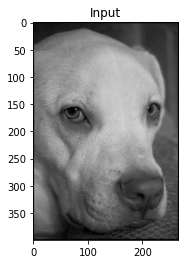

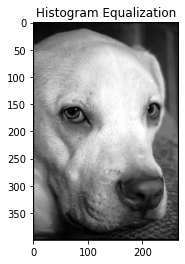

In [14]:
# show the original grayscale image and equalized image
plt_imshow("Input", gray)
plt_imshow("Histogram Equalization", equalized)

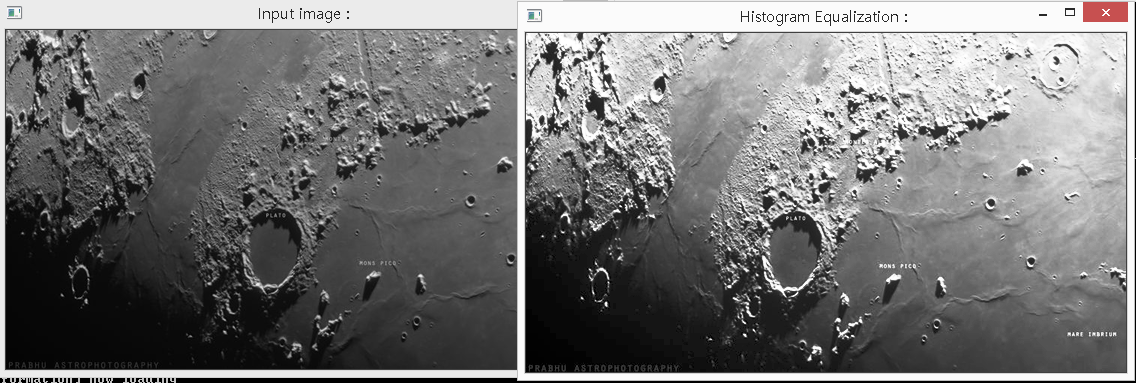

In [4]:
from IPython.display import Image
Image("/content/opencv-histogram-equalization/images/moon_equalizaton_before_After.PNG")

* 기본적인 히스토그램 이퀄라이제이션의 결과는 출력 이미지의 전역대비가 증가함(명암대비가 증가)

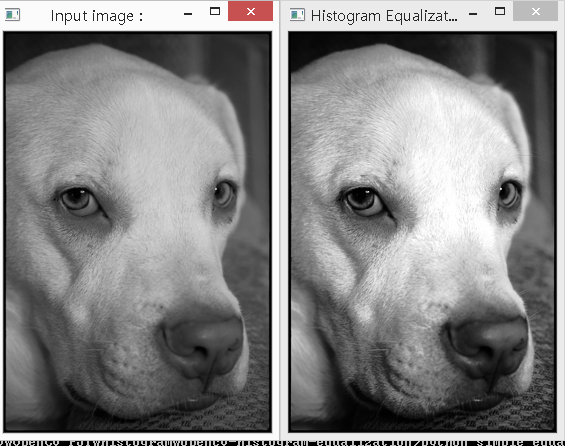

In [5]:
Image("/content/opencv-histogram-equalization/images/dog_equalizaton_before_After.PNG")

* 오른쪽 개의 이미지는 사진색깔이 바랜듯하고, 색상 명암의 대비도 떨어지나 오른쪽의 이퀄라이제이션을 적용한 사진의 경우엔 개의 대비가 개선됨.

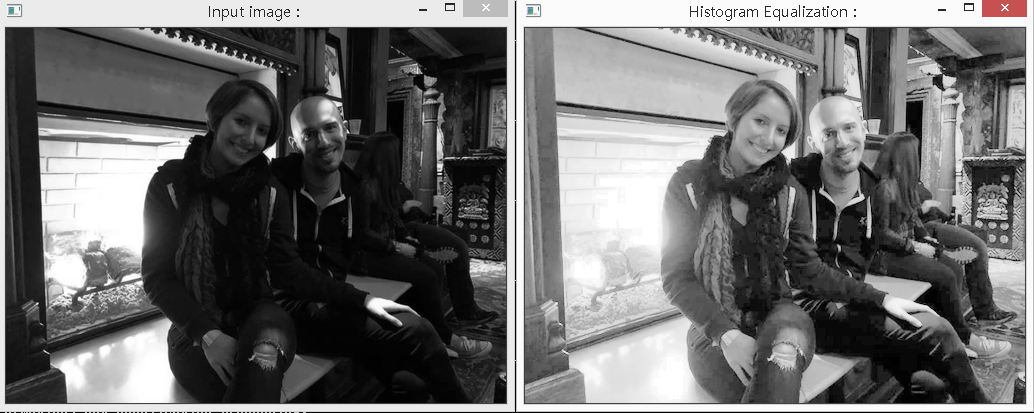

In [6]:
Image("/content/opencv-histogram-equalization/images/boston_equalizaton_before_After.PNG")

* 오른쪽의 이미지는 색깔이 너무 어두워서 특정 커플의 사진도 잘 보이지 않으며, 카메라의 자동 빛 조정으로 인해 어둡니다.
* 왼쪽의 이미지는 이퀄라이제이션 적용후 잘 보이지 않던 커플이 살아났으나, 벽난로의 불빛이 사라졌고 , 이마 부분이 완전히 사라짐.


### OpenCV를 이용한 대비제한 적응형 히스토그램 이퀄라이제이션
* [위키피디아 히스토그램 이퀄라이제이션](https://en.wikipedia.org/wiki/Histogram_equalization)
* [OpenCV 히스토그램 이퀄라이제이션](https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html)


* clip : 대비효과를 주기한 임계치 설정(보통 2에서 5사이의 값을 설정)
이 값을 높게 주게되면 , 대비효과가 높은 만큼 , 이미지의 노이즈도 높아지게 되는 결과가 발생함함을 유의
가능하다면 이 값은 낮으면 낮을수록 좋다.

* tile : 이미지를 화장실 바닥이라고 생각하면, 화장실 바닥을 8*8의 타일로 구성한다고 이해하면 된다.OpenCV이 기본 타일 사이즈는 8*8

In [10]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to the input image")
# ap.add_argument("-c", "--clip", type=float, default=2.0,
# 	help="threshold for contrast limiting")
# ap.add_argument("-t", "--tile", type=int, default=8,
# 	help="tile grid size -- divides image into tile x time cells")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/dog.png",
    "clip": 2.0,
    "tile": 8
}

In [11]:
# 대비제한 적응형 히스토그램 이퀄라이제이션 적용
# 1.Clip Limitation Adaptive Histogram Equalization초기화
print("[INFO] loading input image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. clahe적용
print("[INFO] applying CLAHE...")
clahe = cv2.createCLAHE(clipLimit=args["clip"],
	tileGridSize=(args["tile"], args["tile"]))
equalized = clahe.apply(gray)

[INFO] loading input image...
[INFO] applying CLAHE...


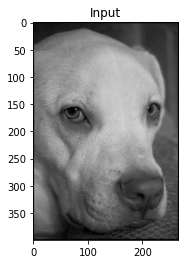

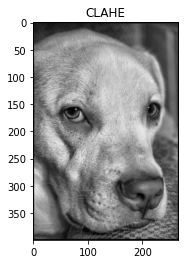

In [12]:
# show the original grayscale image and CLAHE output image
plt_imshow("Input", gray)
plt_imshow("CLAHE", equalized)

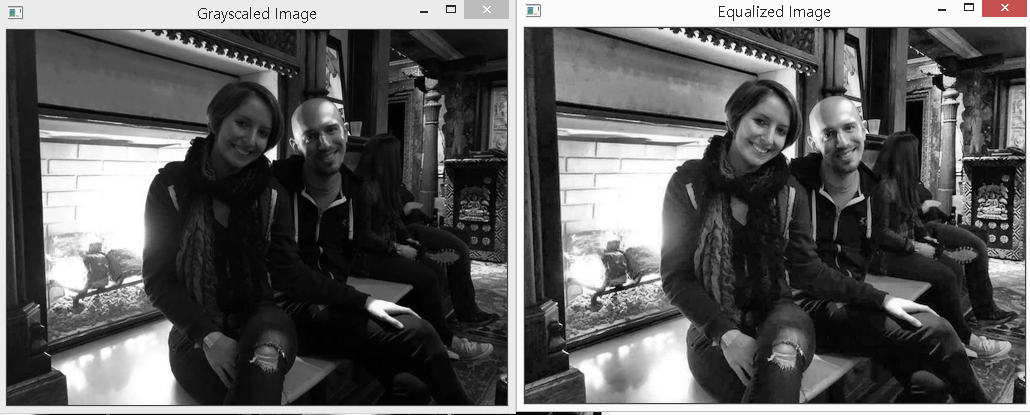

In [7]:
Image("/content/opencv-histogram-equalization/images/boston_adative_equalization.PNG")